In [2]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

print("Drive mounted successfully.")

Mounted at /content/drive
Drive mounted successfully.


In [2]:
!unzip "/content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/data/outfit_data.zip" -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/outfit_data/Fashion Product Images (Small)/images/58129.jpg  
  inflating: /content/outfit_data/Fashion Product Images (Small)/images/5813.jpg  
  inflating: /content/outfit_data/Fashion Product Images (Small)/images/58131.jpg  
  inflating: /content/outfit_data/Fashion Product Images (Small)/images/58132.jpg  
  inflating: /content/outfit_data/Fashion Product Images (Small)/images/58133.jpg  
  inflating: /content/outfit_data/Fashion Product Images (Small)/images/58135.jpg  
  inflating: /content/outfit_data/Fashion Product Images (Small)/images/58136.jpg  
  inflating: /content/outfit_data/Fashion Product Images (Small)/images/58137.jpg  
  inflating: /content/outfit_data/Fashion Product Images (Small)/images/58138.jpg  
  inflating: /content/outfit_data/Fashion Product Images (Small)/images/58139.jpg  
  inflating: /content/outfit_data/Fashion Product Images (Small)/images/5814.jpg  
  inflating: /content/outfi

----------------------------------------------------------------------------------------------------------

In [13]:
# scripts/preprocess_outfit_data.py
import pandas as pd
import os

# Input and output paths
INPUT_CSV = "/content/outfit_data/Fashion Product Images (Small)/styles.csv"
OUTPUT_CSV = "/content/outfit_data/Fashion Product Images (Small)/filtered_top_bottom.csv"
IMAGE_DIR = "/content/outfit_data/Fashion Product Images (Small)/images"

def preprocess_top_bottom():
    df = pd.read_csv(INPUT_CSV, on_bad_lines='skip')

    # Keep only Topwear & Bottomwear based on masterCategory
    df_filtered_category = df[df['masterCategory'].isin(['Apparel'])] # Apparel contains Topwear and Bottomwear

    # Further filter by subCategory to get only Topwear and Bottomwear
    df_filtered_sub = df_filtered_category[df_filtered_category['subCategory'].isin(['Topwear', 'Bottomwear'])]


    # Keep only essential columns, including masterCategory for the value_counts() call
    required_cols = ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'season', 'usage']
    df_final = df_filtered_sub[required_cols]

    # Add image path
    df_final['image_path'] = df_final['id'].astype(str) + ".jpg"
    df_final['image_full_path'] = df_final['image_path'].apply(lambda x: os.path.join(IMAGE_DIR, x))


    # Remove missing images
    df_final = df_final[df_final['image_full_path'].apply(os.path.exists)]

    print("Filtered dataset shape:", df_final.shape)
    # Now masterCategory should be available for value_counts()
    print(df_final['masterCategory'].value_counts())
    print(df_final['subCategory'].value_counts())


    df_final.to_csv(OUTPUT_CSV, index=False)
    print(f"Saved filtered CSV at: {OUTPUT_CSV}")
    display(df_final.head())


if __name__ == "__main__":
    preprocess_top_bottom()

/tmp/ipython-input-3600763871.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['image_path'] = df_final['id'].astype(str) + ".jpg"
/tmp/ipython-input-3600763871.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['image_full_path'] = df_final['image_path'].apply(lambda x: os.path.join(IMAGE_DIR, x))


Filtered dataset shape: (18091, 9)
masterCategory
Apparel    18091
Name: count, dtype: int64
subCategory
Topwear       15398
Bottomwear     2693
Name: count, dtype: int64
Saved filtered CSV at: /content/outfit_data/Fashion Product Images (Small)/filtered_top_bottom.csv


,id,gender,masterCategory,subCategory,articleType,season,usage,image_path,image_full_path
0,15970,Men,Apparel,Topwear,Shirts,Fall,Casual,15970.jpg,/content/outfit_data/Fashion Product Images (S...
1,39386,Men,Apparel,Bottomwear,Jeans,Summer,Casual,39386.jpg,/content/outfit_data/Fashion Product Images (S...
3,21379,Men,Apparel,Bottomwear,Track Pants,Fall,Casual,21379.jpg,/content/outfit_data/Fashion Product Images (S...
4,53759,Men,Apparel,Topwear,Tshirts,Summer,Casual,53759.jpg,/content/outfit_data/Fashion Product Images (S...
5,1855,Men,Apparel,Topwear,Tshirts,Summer,Casual,1855.jpg,/content/outfit_data/Fashion Product Images (S...


Found 14472 validated image filenames belonging to 2 classes.
Found 3619 validated image filenames belonging to 2 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 2,332,481 (8.90 MB)

 Non-trainable params: 89,600 (350.00 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
453/453 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9515 - loss: 0.1089

453/453 ━━━━━━━━━━━━━━━━━━━━ 965s 2s/step - accuracy: 0.9516 - loss: 0.1088 - val_accuracy: 0.9947 - val_loss: 0.0285
Epoch 2/15
453/453 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9960 - loss: 0.0132

453/453 ━━━━━━━━━━━━━━━━━━━━ 977s 2s/step - accuracy: 0.9960 - loss: 0.0132 - val_accuracy: 0.9950 - val_loss: 0.0253
Epoch 3/15
453/453 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9970 - loss: 0.0099

453/453 ━━━━━━━━━━━━━━━━━━━━ 922s 2s/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9972 - val_loss: 0.0204
Epoch 4/15
453/453 ━━━━━━━━━━━━━━━━━━━━ 913s 2s/step - accuracy: 0.9977 - loss: 0.0066 - val_accuracy: 0.9964 - val_loss: 0.0161
Epoch 5/15
453/453 ━━━━━━━━━━━━━━━━━━━━ 912s 2s/step - accuracy: 0.9974 - loss: 0.0073 - val_accuracy: 0.9970 - val_loss: 0.0131
Epoch 6/15
453/453 ━━━━━━━━━━━━━━━━━━━━ 931s 2s/step - accuracy: 0.9991 - loss: 0.0028 - val_accuracy: 0.9972 - val_loss: 0.0157
Epoch 7/15
453/453 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9985 - loss: 0.0040

453/453 ━━━━━━━━━━━━━━━━━━━━ 970s 2s/step - accuracy: 0.9985 - loss: 0.0040 - val_accuracy: 0.9978 - val_loss: 0.0194
Epoch 8/15
453/453 ━━━━━━━━━━━━━━━━━━━━ 951s 2s/step - accuracy: 0.9977 - loss: 0.0059 - val_accuracy: 0.9978 - val_loss: 0.0182
114/114 ━━━━━━━━━━━━━━━━━━━━ 85s 746ms/step - accuracy: 0.9962 - loss: 0.0246

Validation Accuracy: 99.70%


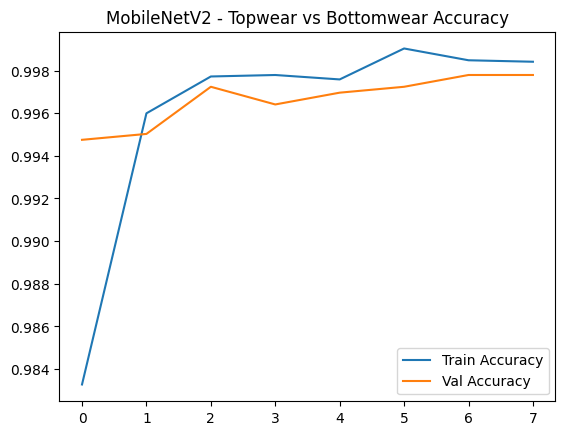

In [15]:
# models/outfit_model/train_outfit_model.py
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ============== CONFIGURATION ==============
CSV_PATH = "/content/outfit_data/Fashion Product Images (Small)/filtered_top_bottom.csv"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15
SAVE_DIR = "/content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model"
os.makedirs(SAVE_DIR, exist_ok=True)
# ===========================================

# Load filtered CSV
df = pd.read_csv(CSV_PATH)

# Encode labels (Topwear=0, Bottomwear=1) and convert to string
df['label'] = df['subCategory'].apply(lambda x: '0' if x == 'Topwear' else '1') # Convert to string

# Split into train/test
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42) # Stratify by string labels


# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_full_path', # Use image_full_path
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_full_path', # Use image_full_path
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# ============== MODEL DEFINITION ==============
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True
for layer in base_model.layers[:-100]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Callbacks
checkpoint = ModelCheckpoint(os.path.join(SAVE_DIR, "mobilenetv2_top_bottom.h5"),
                             save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS, callbacks=[checkpoint, early_stop])

# Evaluate model
val_loss, val_acc = model.evaluate(val_gen)
print(f"\nValidation Accuracy: {val_acc*100:.2f}%")

# Plot training performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("MobileNetV2 - Topwear vs Bottomwear Accuracy")
plt.show()

In [16]:
from sklearn.metrics import classification_report
import numpy as np

# Get true labels from the validation generator
val_labels = val_gen.classes
# Get the class names
class_names = list(val_gen.class_indices.keys())

# Make predictions on the validation data
val_gen.reset() # Reset the generator to ensure correct order
predictions = model.predict(val_gen, steps=len(val_gen))

# For binary classification, predictions are probabilities.
# Convert probabilities to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)


# Generate and print the classification report
# Map class indices back to names for the report
target_names = [class_names[i] for i in sorted(val_gen.class_indices.values())]
report = classification_report(val_labels, predicted_classes, target_names=target_names)
print(report)

114/114 ━━━━━━━━━━━━━━━━━━━━ 89s 765ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3080
           1       1.00      0.98      0.99       539

    accuracy                           1.00      3619
   macro avg       1.00      0.99      0.99      3619
weighted avg       1.00      1.00      1.00      3619



In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(val_labels, predicted_classes)

# Calculate per-class accuracy
# cm[i, i] gives the number of correct predictions for class i
# cm.sum(axis=1)[i] gives the total number of samples in class i
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Print the per-class accuracy
class_names = list(val_gen.class_indices.keys()) # Get class names from generator
print("Per-Class Accuracy:")
for i, class_name in enumerate(sorted(class_names)): # Iterate through sorted class names
    print(f"  {class_name}: {per_class_accuracy[i]:.4f}")

Per-Class Accuracy:
  0: 0.9994
  1: 0.9833


In [18]:
# models/outfit_model/predict_outfit_type.py
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import os

MODEL_PATH = "/content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom.h5"
model = tf.keras.models.load_model(MODEL_PATH)

CLASS_NAMES = ['Topwear', 'Bottomwear']

def predict_outfit(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)
    prediction = model.predict(x)
    label = CLASS_NAMES[int(prediction[0] > 0.5)]
    print(f"Predicted class: {label}")
    return label

if __name__ == "__main__":
    test_img = "/content/topwear example male.png"
    predict_outfit(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Topwear


/tmp/ipython-input-3295747177.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = CLASS_NAMES[int(prediction[0] > 0.5)]


In [22]:
if __name__ == "__main__":
    test_img = "/content/topwear example female (1).png"
    predict_outfit(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted class: Topwear


/tmp/ipython-input-3295747177.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = CLASS_NAMES[int(prediction[0] > 0.5)]


In [20]:
if __name__ == "__main__":
    test_img = "/content/bottomwear example male.png"
    predict_outfit(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted class: Bottomwear


/tmp/ipython-input-3295747177.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = CLASS_NAMES[int(prediction[0] > 0.5)]


In [21]:
if __name__ == "__main__":
    test_img = "/content/bottomwear example female.png"
    predict_outfit(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted class: Bottomwear


/tmp/ipython-input-3295747177.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = CLASS_NAMES[int(prediction[0] > 0.5)]


In [23]:
if __name__ == "__main__":
    test_img = "/content/shirt.png"
    predict_outfit(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted class: Topwear


/tmp/ipython-input-3295747177.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = CLASS_NAMES[int(prediction[0] > 0.5)]


In [24]:
if __name__ == "__main__":
    test_img = "/content/topwear_women_croptop.png"
    predict_outfit(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: Topwear


/tmp/ipython-input-3295747177.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = CLASS_NAMES[int(prediction[0] > 0.5)]


In [25]:
if __name__ == "__main__":
    test_img = "/content/top with face.png"
    predict_outfit(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted class: Topwear


/tmp/ipython-input-3295747177.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = CLASS_NAMES[int(prediction[0] > 0.5)]


In [26]:
if __name__ == "__main__":
    test_img = "/content/bottom with other things.png"
    predict_outfit(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: Bottomwear


/tmp/ipython-input-3295747177.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = CLASS_NAMES[int(prediction[0] > 0.5)]


In [3]:
import tensorflow as tf

# Load saved model from .h5
model = tf.keras.models.load_model('/content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom.h5', compile=False)

# Save in the Keras native format
model.save('/content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom.keras')


In [10]:
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom.h5"
model = load_model(model_path, compile=False)
print("Model loaded successfully from .h5")


Model loaded successfully from .h5


In [8]:
export_path = "/content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom_savedmodel"

model.export(export_path)
print("Model exported successfully to SavedModel format:", export_path)


Saved artifact at '/content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138603495177680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603495173840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603495176336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603495176912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603495175184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603495177872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603495177488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603495175952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138603495174800: TensorSpec(shape=(), dtype=tf.resource,

In [9]:
!zip -r mobilenetv2_top_bottom_savedmodel.zip "/content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom_savedmodel"
from google.colab import files
files.download("mobilenetv2_top_bottom_savedmodel.zip")

  adding: content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom_savedmodel/ (stored 0%)
  adding: content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom_savedmodel/variables/ (stored 0%)
  adding: content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom_savedmodel/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom_savedmodel/variables/variables.index (deflated 78%)
  adding: content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom_savedmodel/assets/ (stored 0%)
  adding: content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfit_model/mobilenetv2_top_bottom_savedmodel/saved_model.pb (deflated 91%)
  adding: content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/models/outfi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>